<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Practica19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica #19: Ejercicios con EDA 2

---



Materia: Programación para Analítica Descriptiva y Predictiva

Alumno: Alejandra Margarita Rivas Simental

Unidad 02: Análisis Descriptivo de los Datos

Maestría en Inteligencia Artificial y Analítica de Datos

Universidad Autónoma de Ciudad Juárez


---


Instrucciones para los estudiantes:

1. Descargar el archivo haberman.data desde el enlace proporcionado.

2. Realizar un EDA completo, incluyendo:

  *   Descripción de los datos.

* Histogramas para las columnas numéricas.

* Gráficas de barras para la columna categórica status (supervivencia).

* Boxplots para identificar outliers en las columnas numéricas.

* Matriz de correlación y mapa de calor.

* Pairplot para visualizar relaciones entre variables numéricas.

* Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados

5. Responde a estas preguntas y sube tus conclusiones a un PDF (se verificará el uso de IA)

* **Análisis Exploratorio de Datos (EDA):**



* ¿Qué información relevante obtuviste de los histogramas y gráficas de densidad (PDF)? ¿Alguna variable parece seguir una distribución normal?
¿Qué insights obtuviste de las gráficas de barras para la variable categórica status? ¿Cómo se distribuyen los pacientes según su estado de supervivencia?

* **Pruebas de Normalidad:**

* ¿Qué variables no siguen una distribución normal según las pruebas de Shapiro-Wilk, Anderson-Darling y Kolmogorov-Smirnov? ¿Cómo afecta esto al modelo de regresión lineal?

* ¿Qué conclusiones puedes extraer de los QQplots? ¿Qué variables tienen una distribución cercana a la normal?

* **Tratamiento de Datos Faltantes:**

* ¿Qué columnas tenían todos los valores faltantes? ¿Cómo manejaste estas columnas?

* ¿Cómo cambió el EDA después de la imputación de datos? ¿Observaste diferencias significativas en las distribuciones de las variables?

*  **Matriz de Correlación y Pairplot:**

* ¿Qué relaciones lineales identificaste en la matriz de correlación y el pairplot? ¿Alguna variable tiene una correlación fuerte con la variable objetivo?

* ¿Cómo podrías utilizar esta información para seleccionar características (features) en un modelo de regresión lineal?

* **Análisis Exploratorio de Datos (EDA):**

* ¿Qué información relevante obtuviste de los histogramas y gráficas de densidad (PDF)? ¿Alguna variable parece seguir una distribución normal?

* ¿Qué insights obtuviste de las gráficas de barras para la variable categórica status? ¿Cómo se distribuyen los pacientes según su estado de supervivencia?

* **Pruebas de Normalidad:**

* ¿Qué variables no siguen una distribución normal según las pruebas de Shapiro-Wilk, Anderson-Darling y Kolmogorov-Smirnov? ¿Cómo afecta esto al modelo de regresión lineal?

* ¿Qué conclusiones puedes extraer de los QQplots? ¿Qué variables tienen una distribución cercana a la normal?

* **Tratamiento de Datos Faltantes:**

* ¿Qué columnas tenían todos los valores faltantes? ¿Cómo manejaste estas columnas?

* ¿Cómo cambió el EDA después de la imputación de datos? ¿Observaste diferencias significativas en las distribuciones de las variables?

* **Matriz de Correlación y Pairplot:**

* ¿Qué relaciones lineales identificaste en la matriz de correlación y el pairplot? ¿Alguna variable tiene una correlación fuerte con la variable objetivo?

* ¿Cómo podrías utilizar esta información para seleccionar características (features) en un modelo de regresión lineal?

In [35]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


##Descripción de los datos.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Mostrar las primeras filas del dataset
print(data.head())
print('\n')

#Obtenemos la informacion de las columnas, asi como el tipo de dato que tenemos
print('El tipo de dato de cada columna es: ')
print(data.info())
print('\n')

# Estadísticas descriptivas
print('El EDA de los datos es: ')
print(data.describe())
print('\n')

#Obtenemos la moda de cada una de las columnas(el describe no la ofrece por si sola)
# Obtener la moda de cada columna
moda = data.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas

# Mostrar la moda de cada columna
print("Moda de cada columna:")
print(moda)
print('\n')

# Verificar valores faltantes
print("Valores faltantes:")
print(data.isnull().sum())


   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


El tipo de dato de cada columna es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


El EDA de los datos es: 
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000  

##Histogramas para las columnas numéricas.

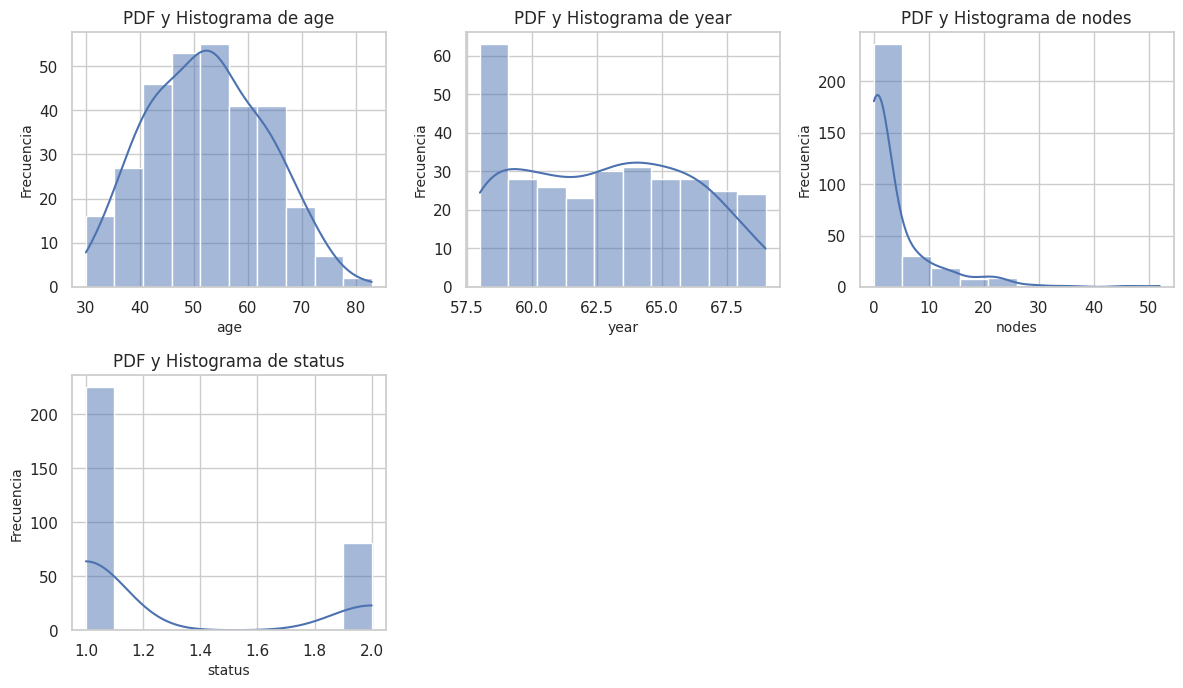

In [37]:
# Crear una lista de las columnas del dataset
columns = data.select_dtypes(include=['float64', 'int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(data[col], kde=True, bins=10)
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

##Gráficas de barras para la columna categórica status (supervivencia).

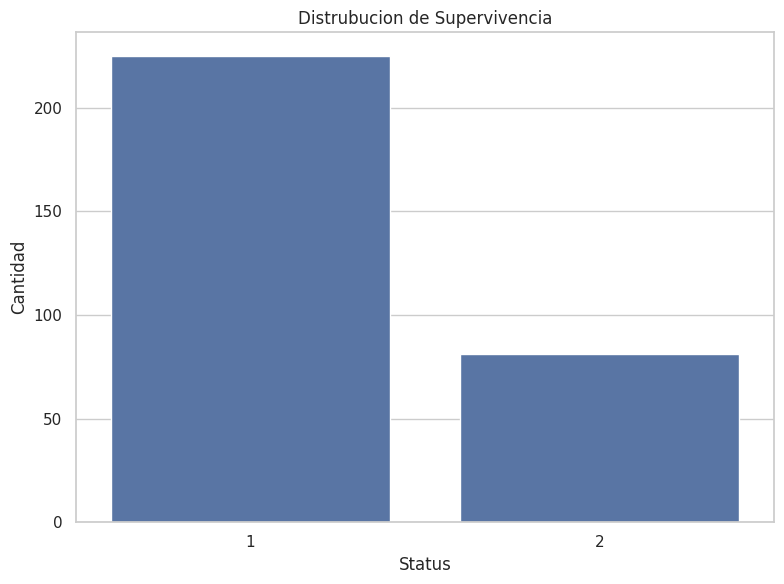

In [38]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficas de barras para cada variable categórica
plt.figure(figsize=(8, 6))

# Gráfica de barras para 'cut'
sns.countplot(x='status', data=data)
plt.title('Distrubucion de Supervivencia')
plt.xlabel('Status')
plt.ylabel('Cantidad')


# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

##Boxplots para identificar outliers en las columnas numéricas.

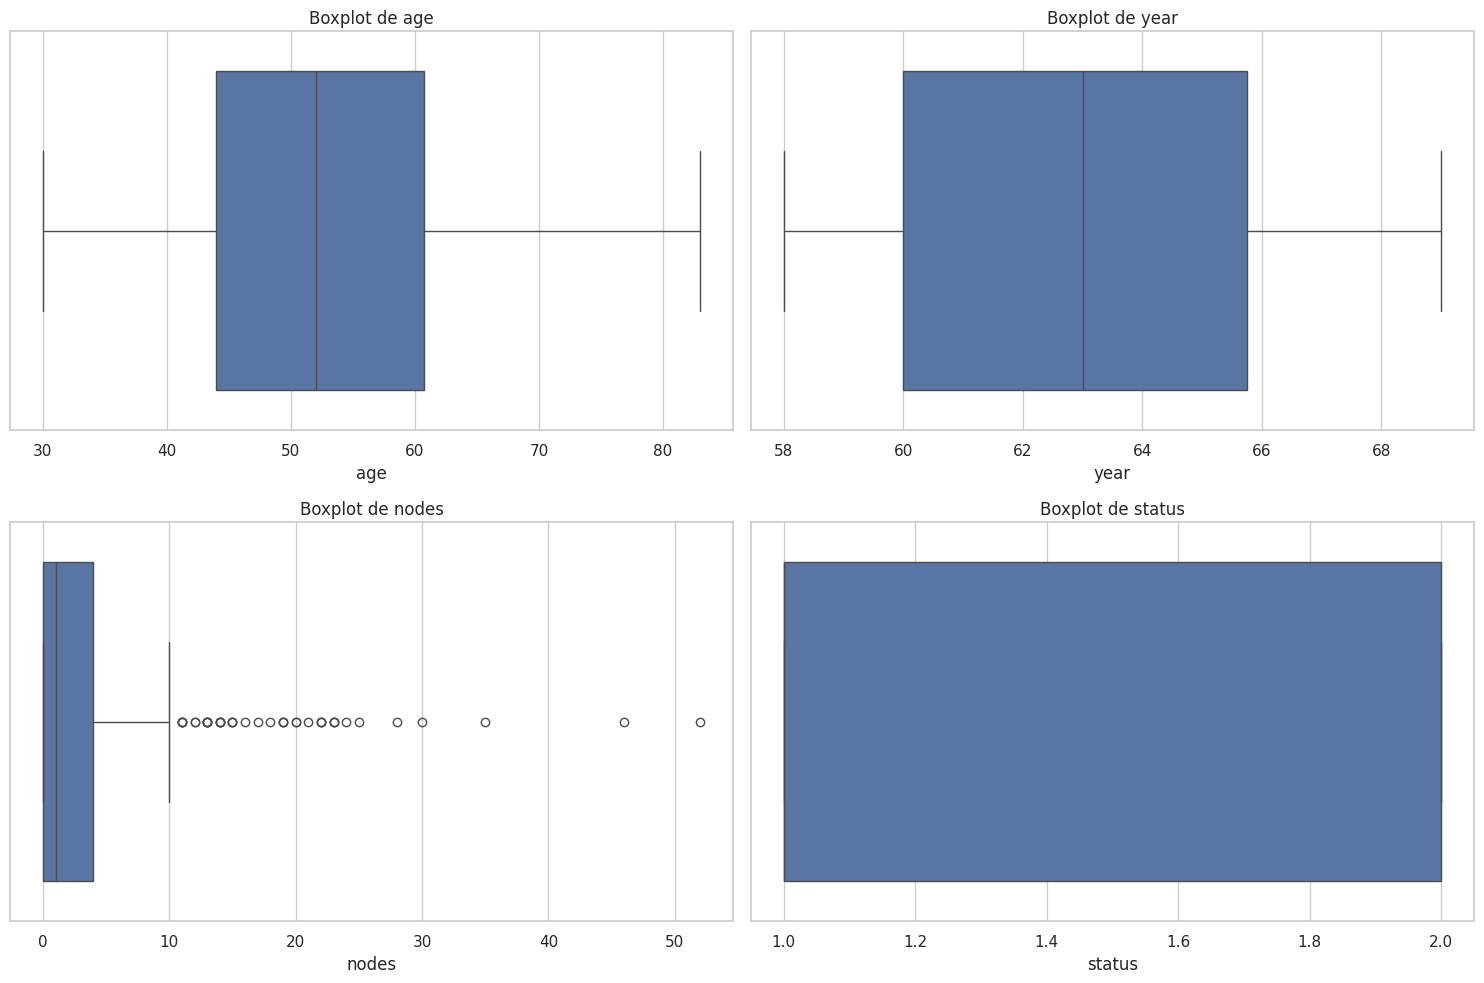

In [39]:
# Seleccionar solo columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

##Matriz de correlación y mapa de calor.

Matriz de correlación:
             age      year     nodes    status
age     1.000000  0.089529 -0.063176  0.067950
year    0.089529  1.000000 -0.003764 -0.004768
nodes  -0.063176 -0.003764  1.000000  0.286768
status  0.067950 -0.004768  0.286768  1.000000


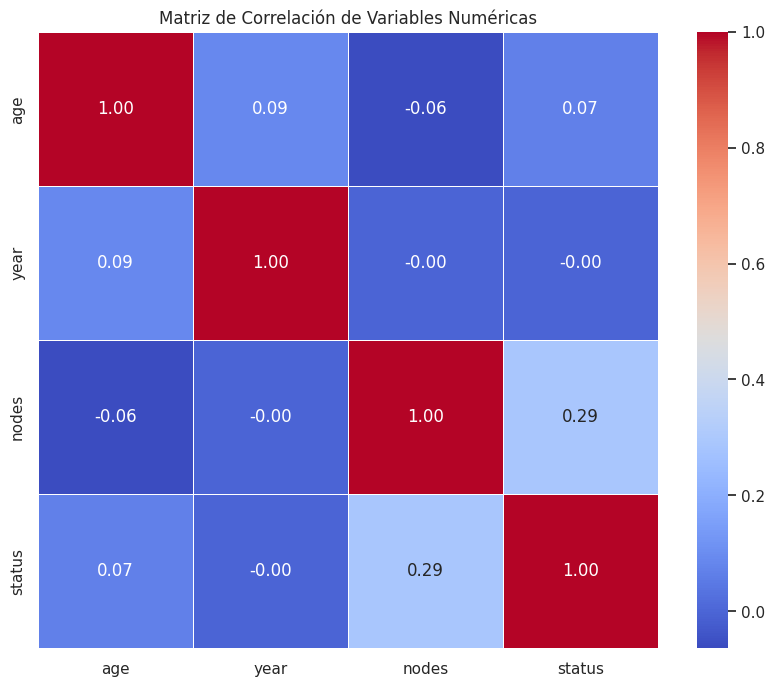

In [40]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

##Pairplot para visualizar relaciones entre variables numéricas.

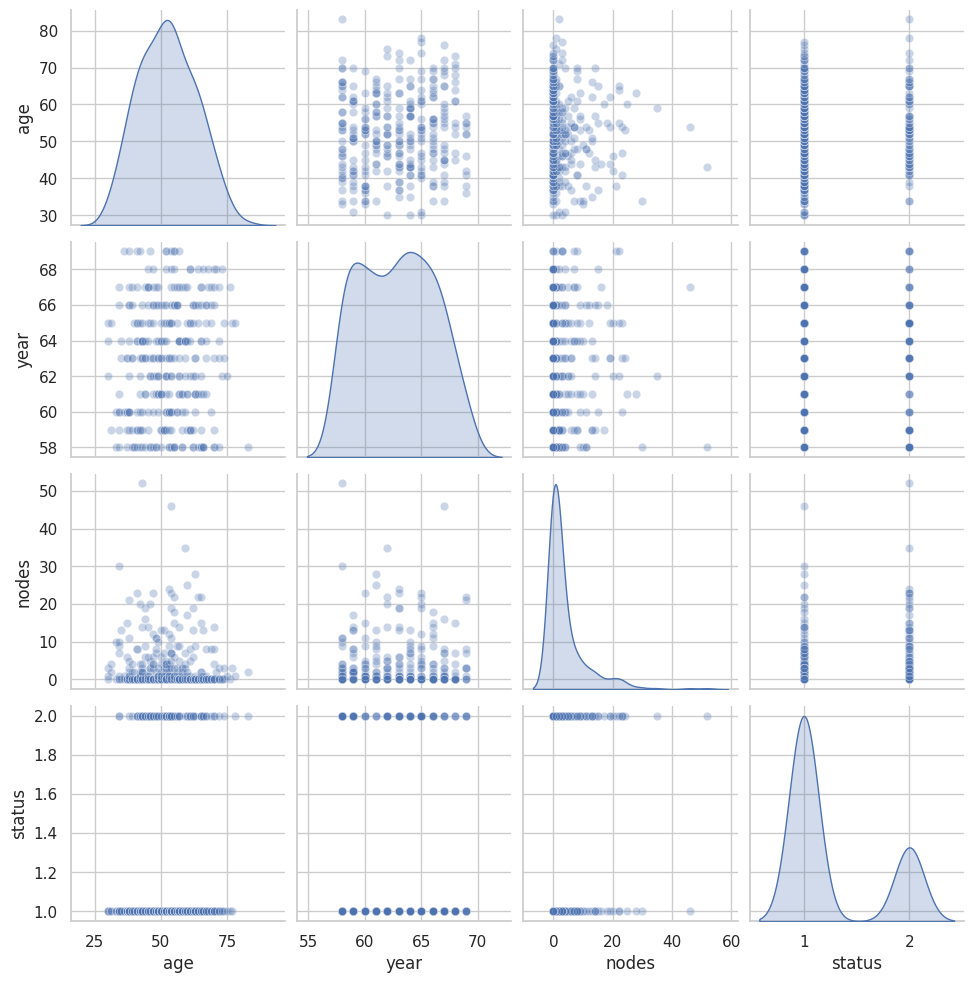

In [41]:
# Seleccionar solo las columnas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(data[numerical_cols], plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

##Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.

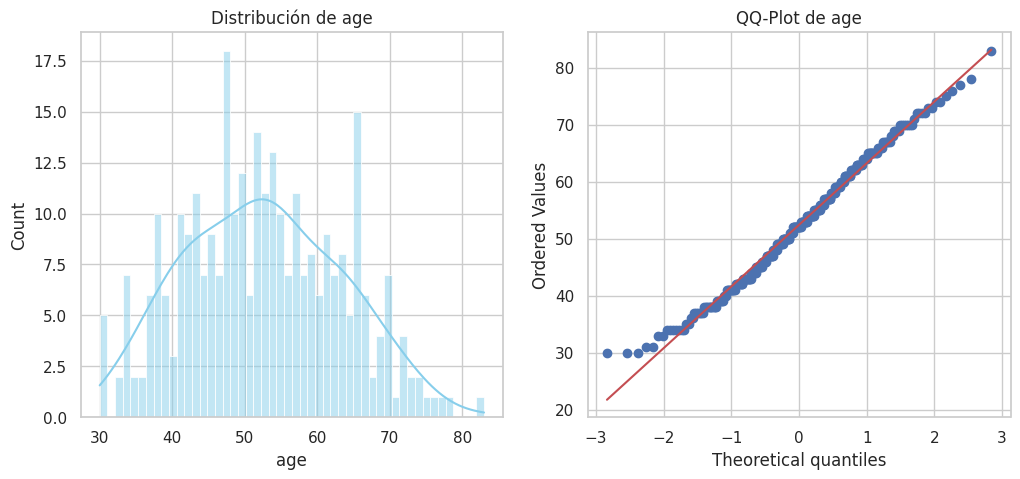


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.026046600006626112
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


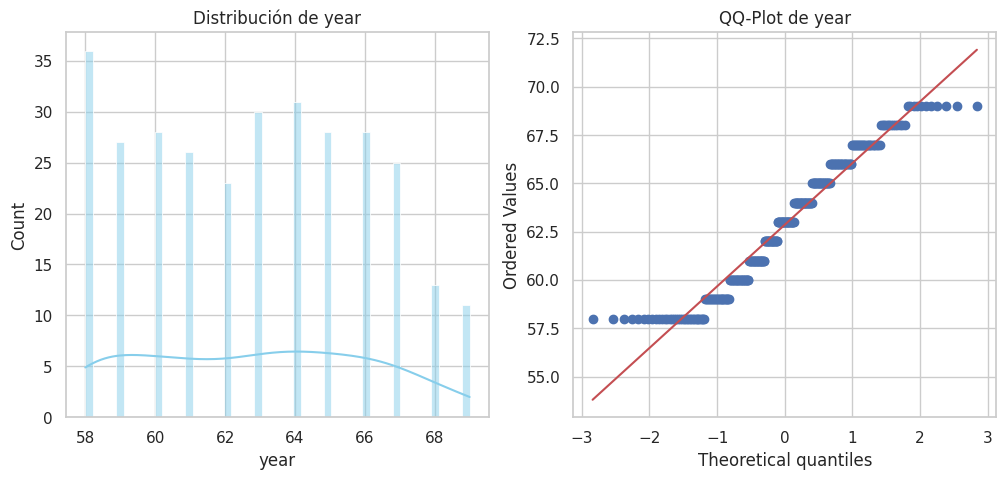


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 4.5689155599576554e-09
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


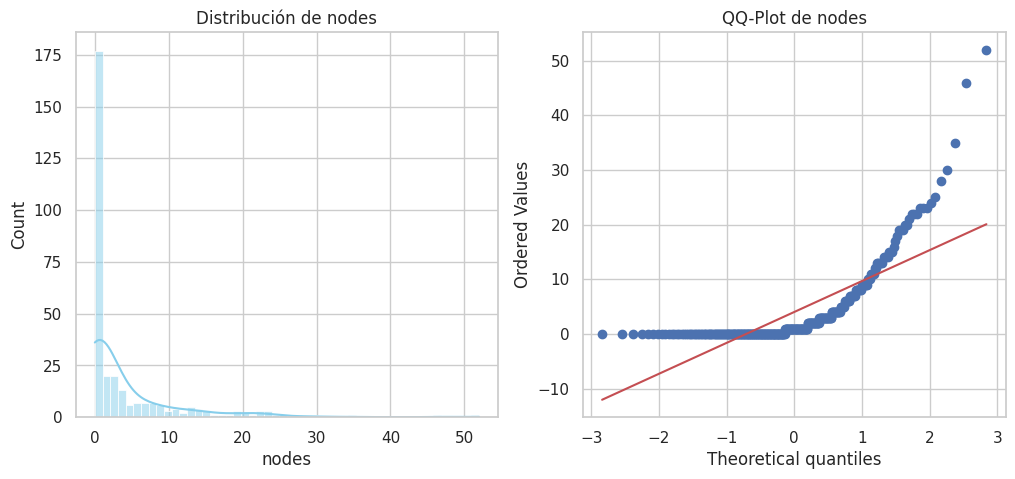


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 1.320475620268927e-25
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


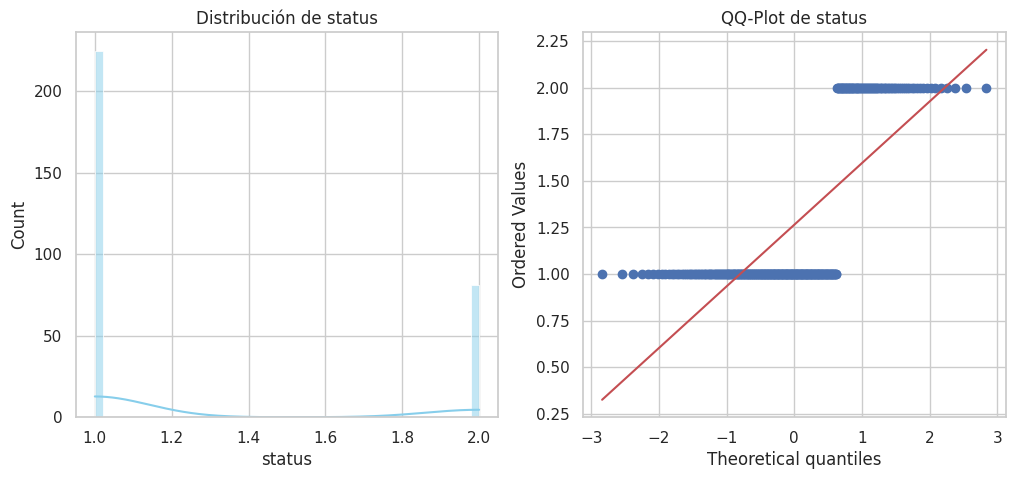


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 2.648119027537656e-27
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [44]:
df = data
import scipy.stats as stats

# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in numeric_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

## Identificar y tratar los datos faltantes

In [46]:
# Verificar valores faltantes
print("Valores faltantes antes de la imputación:")
print(data.isnull().sum())

Valores faltantes antes de la imputación:
0


## Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados

No hay datos faltantes en el dataset por lo que el EDA se queda igual que al inicio
